# Testing MPASODomain

This notebook tests the functionality of the `MPASODomain` object with mesh defined by the `MPASMesh` object.

In [1]:
import sys
import os
sys.path.append("..")
from mpasview import *

## Test 01

A 120 by 120 mesh with the size of 600 m.

In [2]:
# mesh file
meshroot = os.environ['HOME']+'/data/mpas/grids'
meshfile1 = meshroot+'/test01_50layer.200206.nc'

In [3]:
# define MPASMesh
mpasmesh1 = MPASMesh(name='test01', filepath=meshfile1)
print(mpasmesh1)

<class 'mpasview.data.MPASMesh'>:
        name: test01
      ncells: 14400
      nedges: 43200
   nvertices: 28800
   on sphere: False
 is periodic: True
    x period: 72000.0
    y period: 62353.82907247958


### Plot the temperature (on cells)

By default `MPASODomain` assumes data is on cells (`position='cell'`).

In [4]:
# load data
varname = 'temperature'
data1 = xr.open_dataset(meshfile1)[varname].data[0,:,0]

In [5]:
# define MPASODomain
mpasomap1 = MPASODomain(data=data1, name='Temperature', units='degC',
                     mesh=mpasmesh1)
print(mpasomap1)

<class 'mpasview.data.MPASODomain'> (size=14400):
    name: Temperature
   units: degC
    data: [16.109937 16.109931 ... 16.107307 16.107310]
       x: [300.000000 900.000000 ... 71400.000000 72000.000000]
       y: [519.615242 519.615242 ... 62353.829072 62353.829072]
    mesh: test01
position: cell


Plotting 'Temperature (degC)' on x-y domain (14400 data points)...
CPU times: user 133 ms, sys: 8.49 ms, total: 141 ms
Wall time: 140 ms


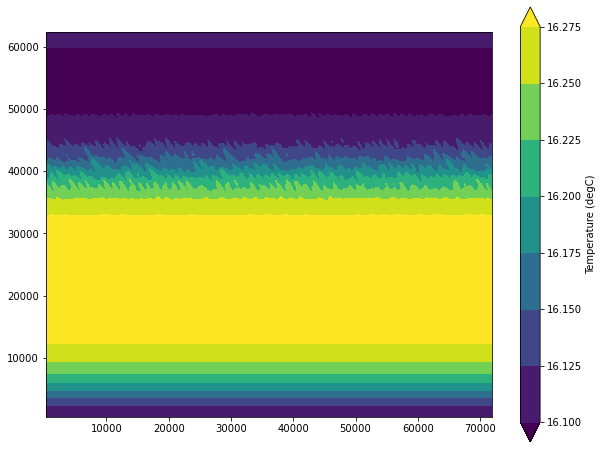

In [6]:
%%time
plt.figure(figsize=[10,8])
fig = mpasomap1.plot(ptype='contourf')
plt.gca().set_aspect(1)

Plotting 'Temperature (degC)' on x-y domain (14400 data points)...
CPU times: user 1.87 s, sys: 43.3 ms, total: 1.91 s
Wall time: 1.63 s


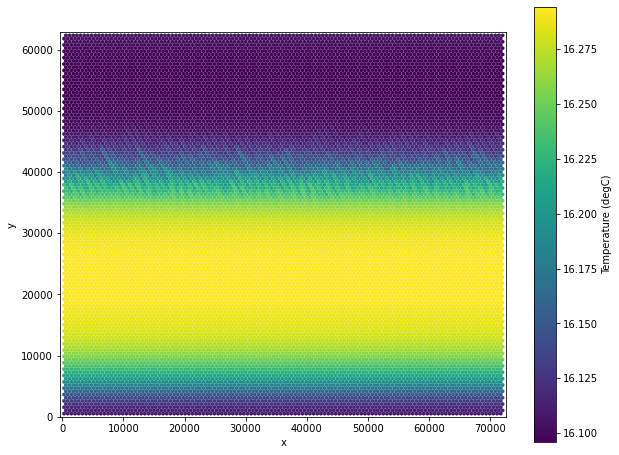

In [7]:
%%time
plt.figure(figsize=[10,8])
fig = mpasomap1.plot(ptype='pcolor')
plt.gca().set_aspect(1)

### Plot the area of the dual cell (triangles centered on vertices)

The area of the dual cell is an example of variables centered on vertices by setting `position='vertex'`.

In [8]:
# load data
varname = 'areaTriangle'
data2 = xr.open_dataset(meshfile1)[varname].data

In [9]:
# define MPASODomain
mpasomap2 = MPASODomain(data=data2, name='Due mesh area',
                        units='m$^2$', position='vertex',
                        mesh=mpasmesh1)

Plotting 'Due mesh area (m$^2$)' on x-y domain (28800 data points)...
CPU times: user 4.01 s, sys: 81.4 ms, total: 4.09 s
Wall time: 3.57 s


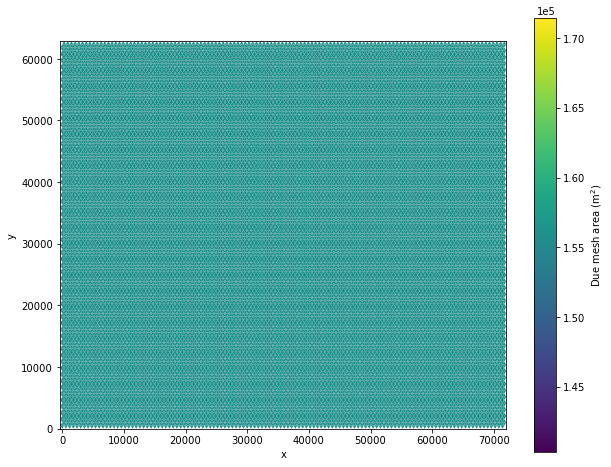

In [10]:
%%time
plt.figure(figsize=[10,8])
fig = mpasomap2.plot(ptype='pcolor')
plt.gca().set_aspect(1)
# plt.xlim([0, 10000])
# plt.ylim([0, 10000])

## Test 02

A 'single column' mesh (16 cells).

In [11]:
## mesh file
meshroot = os.environ['HOME']+'/data/mpas/grids'
meshfile2 = meshroot+'/test02_80layer.200206.nc'

In [12]:
# define MPASMesh
mpasmesh2 = MPASMesh(name='test02', filepath=meshfile2)
print(mpasmesh2)

<class 'mpasview.data.MPASMesh'>:
        name: test02
      ncells: 16
      nedges: 48
   nvertices: 32
   on sphere: False
 is periodic: True
    x period: 400000.0
    y period: 346410.1615137754


In [13]:
# load data
varname = 'temperature'
data3 = xr.open_dataset(meshfile2)[varname].data[-1,:,0]

In [14]:
# define MPASODomain
mpasomap3 = MPASODomain(data=data3, name='Temperature', units='degC',
                     mesh=mpasmesh2)
print(mpasomap3)

<class 'mpasview.data.MPASODomain'> (size=16):
    name: Temperature
   units: degC
    data: [19.781181 19.788895 ... 19.788895 19.788895]
       x: [50000.000000 150000.000000 ... 300000.000000 400000.000000]
       y: [86602.540378 86602.540378 ... 346410.161514 346410.161514]
    mesh: test02
position: cell


Plotting 'Temperature (degC)' on x-y domain (16 data points)...
CPU times: user 135 ms, sys: 11.8 ms, total: 147 ms
Wall time: 34.1 ms


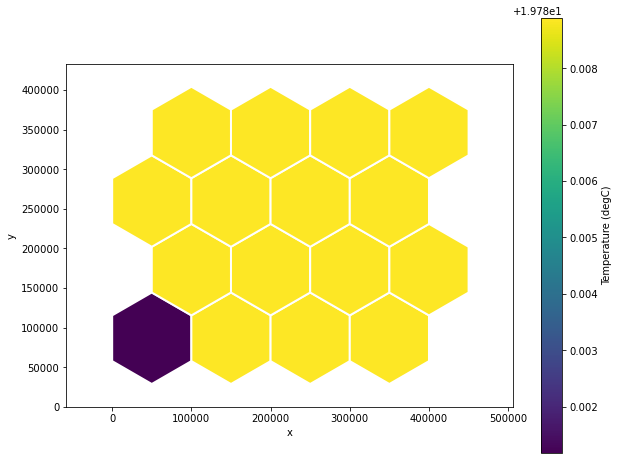

In [15]:
%%time
plt.figure(figsize=[10,8])
fig = mpasomap3.plot(ptype='pcolor', linewidth=2, edgecolor='w')
plt.gca().set_aspect(1)